# Workshop 5

Starter code for workshop 5. You should have seen most of it before, but make sure you understand what it is doing!

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
xarray = data.data
yarray = data.target
print(xarray.shape)
print(yarray.shape)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
print(fullarray.shape)

#    print(yarray.shape) -> output (569行，每行30个值)，shape值(569,)，意思是一维数组，数组中有569个元素
#    y是一个两行三列的二维数组，y.shape[0]代表行数，y.shape[1]代表列数。
#    concatenate() 函数，数组拼接。
#   reshape（）数组重新排序 e.g reshape(两行，4 列)所以reshape(-1,1)表示（任意行，1列）
#  （-1，1）代表，-1代表任意正数数量，1代表每行1个值。
#  【axis=0】当axis=0 时，数组按照行进行拼接；当axis=1 时数组按照列进行拼接。;

(569, 30)
(569,)
(569, 31)


In [4]:
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])




The code below is incomplete and will require some editing to work ...

# Splitting into separate datasets

In [5]:
from sklearn.model_selection import train_test_split
# test_size表示切分的训练集和测试集的比例
#random_state。让每次随机出现的数字都是固定的，而不是一直改变的数字。
# stratify=fullarray[:,-1]则训练集和测试集中的数据分类比例将与xxxxxxx一致

bigtrain_set, test_set = train_test_split(fullarray, test_size=0.2, random_state=42, stratify=fullarray[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42, stratify=bigtrain_set[:,-1])

In [6]:
#注意：这里我们使用stratify option,分层选项，它分割集合，同时试图保持每个集合中分类标签的比例相同（因此需要知道标签）。
#这是在大多数分类任务中使用的一个重要选项（如果您将数据划分为离散集只是为了分层，例如小、中、大值，它也可以用于回归）。

### **Note:** here we use the *stratify* option, which splits the sets whilst trying to keep the same proportions of the classification labels in each (hence it needs to know the labels). This is an important option to use in most classification tasks (and it can also be used for regression if you divide the data into discrete sets just for stratifying, such as small, medium, large values).

In [7]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(364, 30), (364,), (114, 30), (114,), (91, 30), (91,)]


In [8]:
#mean 计算平均值
print(np.mean(y_train),np.mean(y_test),np.mean(y_val))

0.37362637362637363 0.3684210526315789 0.37362637362637363


# Pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()) ])

# SGD Classifier

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, hinge_loss

In [12]:
# You will need to have modified this to allow more options to be passed into the initialisation of the sgd
# In the code below you will see some of the options that I've passed in, but you are free to choose your own

#Q1
#使train:validation:test的比率为60:20:20（在提供的两个步骤中考虑如何做到这一点）。


#在此之后，构建一个预处理管道，然后定义一个名为sgdfn的函数。该函数创建一个SGD分类器，并使用partial_fit方法从循环中一次调用一个历元。
#SGD分类器需要使用warm_start=True选项，以便使partial_fit方法以这种方式工作。（请注意，一个历元是对所有训练数据的一次遍历，
#而一次迭代是对一批训练数据的一次遍历。一批是训练数据的较小子集，
#尽管在我们的例子中，它们与我们不将这个小数据集拆分为较小的批相同，因为我们不需要。）




#add more para 
def sgdfn(nsamp, learnrate):
    sgd = SGDClassifier(warm_start=True, learning_rate='constant', eta0=learnrate)
    X_trainp = preproc_pl..??..(X_train)
    X_valp = preproc_pl..??..(X_val)
    res=[]

    for n in range(1000):
        sgd.partial_fit(X_trainp[???],y_train[???],classes=[0,1])
        y_val_pred = sgd.predict(X_valp)
        sgd_acc = accuracy_score(???,???)
        sgd_loss = hinge_loss(????)
        res += [[sgd_acc,sgd_loss]]

    res = np.array(res)

    plt.figure(figsize=(10,4))#figsize可以指定图片的大小
    plt.subplot(121) #第一个代表行数，第二个代表列数，第三个代表索引位置。举个列子：plt.subplot(2, 3, 5) 和 plt.subplot(235) 
    plt.plot(res[:,0])#第一列所有值
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.subplot(122)
    plt.plot(res[:,1])#第二列所有值
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.show()

    return [res[-1,0],res[-1,1]]




SyntaxError: invalid syntax (3786350495.py, line 19)

## Part 1: Initial fitting

In [69]:
ntrain = X_train.shape[0]
sgdfn(ntrain,1e-5)
#Q1-最后一个问
#在执行该循环之前，有必要将预处理适应于训练集，然后转换训练和验证数据集。要做到这一点，您需要填写适当的电话。
#在循环中，对验证数据调用预测函数，然后计算 精度 和 损失 （铰链损失）。为这些步骤填写必要的代码。
#循环结束后，绘制 精度 和 损耗 ，这些是学习曲线。
#在nsamp设置为训练集的最大值，learn rate设置为1e-5的情况下调用函数。

NameError: name 'X_train' is not defined

## Part 2: Exploring different learning rates

In [70]:
#Q2，探索不同学习率的影响，试图找到学习率过低而无法学习的点，以及学习率过高而变得不稳定的点。提示：您将需要探索多个数量级的大范围值。


res=[]
for lr_exp in range(-8,+3):
    lr = 10.0**lr_exp
    print(f'Learning rate = {lr}')
    res += sgdfn(ntrain,lr)
print(res)

Learning rate = 1e-08


NameError: name 'sgdfn' is not defined

### **Take home message:** get used to seeing what things look like when the learning rate is too small or too large. Unstable results like the ones at the end sometimes produce models that are OK, but almost always the models could be better if the learning rate was better suited to them.

## Part 3: Effect of number of samples on learning rate

In [57]:
#Q3 探索不同训练集大小（通过nsamp）对学习曲线的影响。训练集的大小如何影响学习率的极限，
#即学习率过低或过高时的值？记录几个训练集大小的值，并将结果总结为图表或表格。

#（带回家的信息：习惯在学习率太小或太大的情况下看到事物的样子。不稳定的结果，比如最后的结果，
#有时会产生可以使用的模型，但如果学习率更适合模型，那么几乎所有的模型都会更好。）


res=[]
for nsamp in range(50,ntrain,50):
    print(f'Number of samples = {nsamp}')
    res += sgdfn(nsamp,1e-5)
    

#在执行该循环之前，有必要将预处理适应于训练集，然后转换训练和验证数据集。要做到这一点，您需要填写适当的电话。
#在循环中，对验证数据调用预测函数，然后计算精度和损失（铰链损失）。为这些步骤填写必要的代码。
#循环结束后，绘制精度和损耗，这些是学习曲线。
#在nsamp设置为训练集的最大值，learn rate设置为1e-5的情况下调用函数。

NameError: name 'ntrain' is not defined

In [58]:
#Q4 使用nsamp=100，找出你认为最好的学习率。然后将其与设置learning_rate='optimal'时发生的情况进行比较。
#通过在函数中加入另一个参数来实现这一点。展示每种情况下的学习曲线。你能比“最佳”设置做得更好吗？


for lr_exp in np.arange(-6,-3,0.5):
    lr = 10.0**lr_exp
    print(f'Learning rate = {lr}, n=100')
    sgdfn(100,lr)
    print(f'Learning rate = {lr}, n={ntrain}')
    sgdfn(ntrain,lr)

Learning rate = 1e-06, n=100


NameError: name 'sgdfn' is not defined

In [ ]:
#带回家的信息：有时学习速度在太慢和太不稳定之间有一个相对狭窄的区域。
#这还取决于数据（和任务），因此需要针对每个问题适当调整学习率。

### **Take home message:** there is a relatively narrow zone sometimes of learning rates between too slow and too unstable. This also depends on the data (and the task) so learning rates need to be appropriately tuned for each problem.

## Part 4: Learning rate options

In [148]:
sgdfn(ntrain,1e-5,loop=False)

Number of epochs/iterations performed was 1000


/opt/miniconda3/envs/umlt/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.9824561403508771, 0.6403508771929824]

In [149]:
sgdfn(ntrain,1e-5,learntype='optimal',loop=False)

Number of epochs/iterations performed was 16


[0.9649122807017544, 0.6578947368421053]

In [150]:
sgdfn(ntrain,1e-6,learntype='optimal',loop=False)

Number of epochs/iterations performed was 26


[0.956140350877193, 0.6666666666666666]

In [151]:
sgdfn(ntrain, 1e-5, learntype='constant', loop=False, early_stopping=True, verbose=0, tol=1e-3, n_iter_no_change=5)

Number of epochs/iterations performed was 6


[0.9298245614035088, 0.6929824561403509]

In [ ]:
#带回家的信息：“最佳”方法可能比简单的方法更好，也可能不会更好。不要认为最新的方法或名称/数学最令人印象深刻的方法会做得最好。
#尽可能尝试各种不同的事情。请记住，其中很多都是随机的，所以如果你再次运行它，你会得到不同的结果（很多时候）。
#但是，还要考虑您拥有多少时间或计算资源，因为较新版本需要的纪元/迭代次数要少得多
#（在这种情况下，这非常简单，但对于非常大的数据集和非常大的模型，例如在深度学习中，计算时间可能是一个需要考虑的大问题）。

### **Take home message:** the 'optimal' methods may or may not do better than simpler ones. Don't assume that the latest method or the method with the most impressive name/maths will do the best. Try a range of different things whenever possible. And remember that many of these things are stochastic, so if you ran it again, you'll get a different result (a lot of the time). However, also consider how much time or computational resources you have, as the later versions need far fewer epochs/iterations (in this case it is pretty trivial, but for very big datasets and very big models, such as in deep learning, the computational time can be a big issue to consider).

## Part 5: Regularisation (plus the early stopping extension)

In [ ]:
# Q5 正规化：
#1不要使用上面的功能，而是创建自己的管道，包括一个SGDClassizer，并使用它来适应培训数据和预测验证数据。计算这方面的性能指标
#（准确度和损失），但由于这是一次通话，您无法从中获得学习曲线。记录你的结果，因为这将是下一个实验的基准。
#2默认情况下，SGDClassizer包含L2正则化。它可以由参数alpha控制。尝试将其改变许多个数量级，直到找到一个值，使结果发生显著变化。
#3绘制精度与α值的曲线图。
#4使用的正则化类型由惩罚参数控制。查看可用选项并尝试其他选项，为每个选项绘制类似的图。
#5问：你认为什么是正规化的最佳环境？

Alpha = 1e-08
Number of epochs/iterations performed was 6
Alpha = 1e-07
Number of epochs/iterations performed was 6
Alpha = 1e-06
Number of epochs/iterations performed was 6
Alpha = 1e-05
Number of epochs/iterations performed was 6
Alpha = 0.0001
Number of epochs/iterations performed was 6
Alpha = 0.001
Number of epochs/iterations performed was 6
Alpha = 0.01
Number of epochs/iterations performed was 6
Alpha = 0.1
Number of epochs/iterations performed was 6
Alpha = 1.0
Number of epochs/iterations performed was 6
Alpha = 10.0
Number of epochs/iterations performed was 6
Alpha = 100.0
Number of epochs/iterations performed was 6
Alpha = 1000.0
Number of epochs/iterations performed was 6
Alpha = 10000.0
Number of epochs/iterations performed was 6
Alpha = 100000.0
Number of epochs/iterations performed was 6
Alpha = 1000000.0
Number of epochs/iterations performed was 6
Alpha = 10000000.0
Number of epochs/iterations performed was 6
Alpha = 1e-08
Number of epochs/iterations performed was 6
Alph

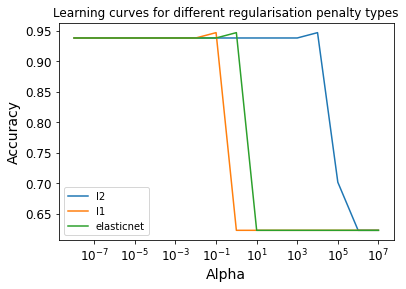

In [144]:
for pen in ['l2','l1','elasticnet']:
    res = []
    alphxvals = np.arange(-8,+8)
    for alphx in alphxvals:
        print(f'Alpha = {10.0**alphx}')
        res += [ sgdfn(100, 1e-6, learntype='constant', loop=False, early_stopping=False, 
                       verbose=0, tol=1e-3, n_iter_no_change=5, alpha=10.0**alphx, penalty=pen) ]
    res=np.array(res)
    plt.semilogx(10.0**alphxvals,res[:,0])
plt.title(f'Learning curves for different regularisation penalty types')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.legend(['l2','l1','elasticnet'])
plt.show()

In [ ]:
#带回家的信息：就它们对同一数据集的影响而言，它们有许多数量级的不同。所以，无论何时，当你调查这个或其他事情的参数时，
#请记住，你应该尝试一个非常广泛的值，以确保你看到了全面的效果。在这种情况下，
#并不真正需要规范化，但太多会降低性能，这是典型的。

### **Take home message:** these are *many orders of magnitude* different from one another in terms of their effect on the same dataset. So whenever you are investigating parameters for this, or other things, remember that you should try a very wide range of values to make sure that you are seeing the full effect. In this case regularisation isn't really needed, but too much lowers the performance, which is typical.

## Part 6: Model comparison and test evaluation

In [ ]:
#Q6 模型比较：

#1我们像往常一样完成标准工作流程-为上述所有参数选择您认为最好的设置。
#2问题：以上哪一个参数（即学习率、学习方法类型或正规化）对最终绩效的影响最大？
#3在当前验证集上测量此方法的性能。
#4.根据培训和验证数据的组合对方法进行重新培训。
#5.在测试集上测量其性能。
#6问题：这种性能比较如何？你期待什么？

In [159]:
sgd = SGDClassifier(learning_rate='constant', eta0=1e-5, 
                        early_stopping=False, 
                        validation_fraction=0.1, penalty='l2')   
sgd_pipe = Pipeline([('preproc',preproc_pl),('sgd',sgd)])

sgd_pipe.fit(X_train,y_train)
y_val_pred = sgd_pipe.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

sgd_pipe.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))
y_test_pred = sgd_pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Validation and Test accuracies are: {val_acc} and {test_acc}')

Validation and Test accuracies are: 0.9473684210526315 and 0.956140350877193


### **Take home message:** although the validation accuracy is, on average, biased by the selection process the random element of sample selection often means that it is hard to know if the test accuracy will be more or less than the validation accuracy, but it should normally be similar. If it is very different then you either have a lot of random variation (often due to sample sizes being too small) or you have a bigger problem in the code or in the selection of the samples.

In [ ]:
#带回家的信息：虽然平均而言，验证准确度受到选择过程的影响，但样本选择的随机因素通常意味着很难知道测试准确度是否会高于或低于验证准确度，
#但它通常应该是相似的。如果是非常不同的，那么你要么有很多随机变化（通常是由于样本量太小），要么在代码或样本选择上有更大的问题。